In [1]:
# Plotting the solution to the Riccati equation given by Kendall & McKendrick

In [63]:
import numpy as np
from numpy import tanh, arctanh
from matplotlib import pyplot as plt

In [67]:
def SIR(beta, gamma, N, S_0, T, country, t_0 = 0):
    rho = gamma/beta * N
    mu = (S_0/rho - 1)
    delta = (rho**2)/S_0
    alpha = np.sqrt(mu**2 + 2*(N-S_0)/delta)
    phi = arctanh(mu/alpha) + (alpha*gamma*t_0)/2
    t = np.arange(T + 1)
    R = delta*(mu + alpha * tanh(alpha*gamma*t/2-phi))
    I = alpha**2 * delta/2 * (1-tanh(alpha*gamma*t/2-phi)**2)
    S = N - I - R
    #S = rho * (-alpha*tanh(alpha*gamma*t/2-phi)+1)

    fig, ax = plt.subplots(figsize = (8,5))
    ax.margins(0.05)
    ax.set_title(country + f", $\\beta = ${str(round(beta,4))}, $\\gamma = ${str(round(gamma,4))}", fontsize = 18)
    ax.plot(t,S, label="$S^*(t)$", color="green",)
    ax.plot(t,I, label="$I^*(t)$", color="red",)
    ax.plot(t,R, label="$R^*(t)$", color="blue",)
    plt.rc('legend',fontsize=16)
    ax.legend()
    plt.show()

    # lim S(t) < 0, falls die folgende Bedingung gilt gamma/beta < 1 - S_0/2N
    print("gamma/beta =", gamma/beta)
    print("1-S_0/(2N) =", 1-S_0/(2*N))

    print("2/(alpha^2 * gamma) =", 2/((alpha**2) * gamma))

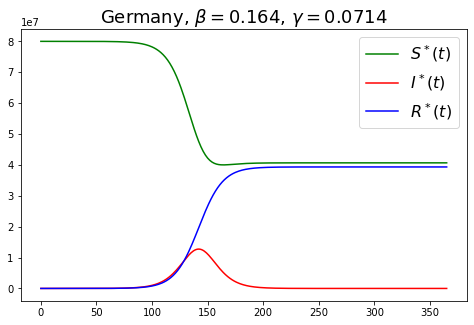

gamma/beta = 0.4355400696864111
1-S_0/(2N) = 0.500000625
2/(alpha^2 * gamma) = 16.67042009121489


In [68]:
N = 8 * 10**7
SIR(beta=0.164, gamma=1/14,N = N, S_0=N-100,country="Germany", t_0=0, T = 365)